In [ ]:
#app reviews sentiment analysis
# app rewiews sentiment analysis means evaluating and understanding the sentiment sexpressed in user rewivews of mobile applications


In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("C:\\Users\\DELL\\Desktop\\xyza\\linkedin-reviews.csv")

In [3]:
df.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


In [6]:
#Exploratory Data Analysis
#we will start by analyzing the distributions of rating.
#It will provide insight into the overall sentiment of the reviews. 
#Then we can explore further, such as analyzing the length of reviews , 
#and possibly derive insights from the text of the reviews.

#Plotting the Distribution of Ratings


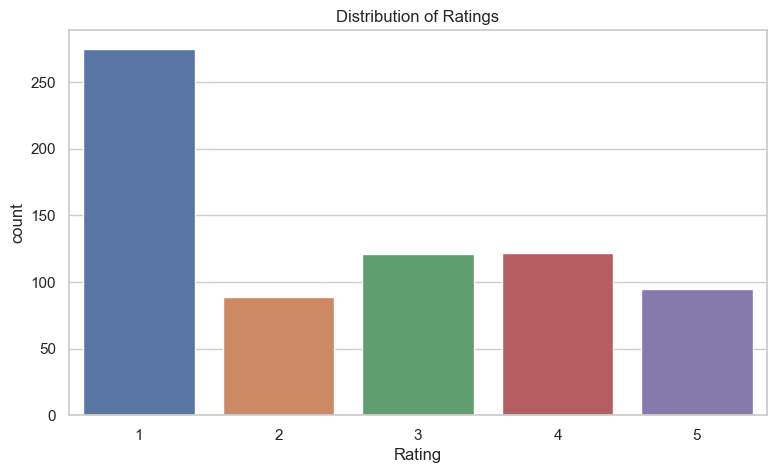

In [10]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (9,5))
sns.countplot(data = df , x = 'Rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('count')
plt.show()

In [ ]:
### AddiTng Sentiment Labels in the Data


In [ ]:
# we will use Textblob library.Textblob provides a polarity scores raning from -1(very negative) to 1(very positive) for a given text .we can use this score to classify each review's sentiment as positive , negative or neutral.


In [12]:
!pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   -- ------------------------------------ 41.0/626.3 kB 393.8 kB/s eta 0:00:02
   ----------------- ---------------------- 276.5/626.3 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------  624.6/626.3 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 3.0 MB/s eta 0:00:00


In [13]:
from textblob import TextBlob

In [14]:
def textblob_sentiment_analysis(review):
    sentiment = TextBlob(review).sentiment
    if sentiment.polarity > 0.1 :
        return 'Positive'
    elif sentiment.polarity < -0.1 :
        return 'Negative'
    else :
        return 'neutral'

In [15]:
df['Sentiment'] = df['Review'].apply(textblob_sentiment_analysis)

In [16]:
df.sample(5)

,Review,Rating,Sentiment
242,Can't see groups and their updates.,3,neutral
9,Clean design with limited features. How about ...,3,Positive
423,Unbelievably slow - to the point that I'm not ...,1,Negative
266,Does the basics but could really use more feat...,3,Positive
508,NICE!,5,Positive


In [17]:
# analyzing app reviews sentiments


sentiment_distribution = df['Sentiment'].value_counts()
sentiment_distribution

Sentiment
Positive    298
neutral     297
Negative    107
Name: count, dtype: int64

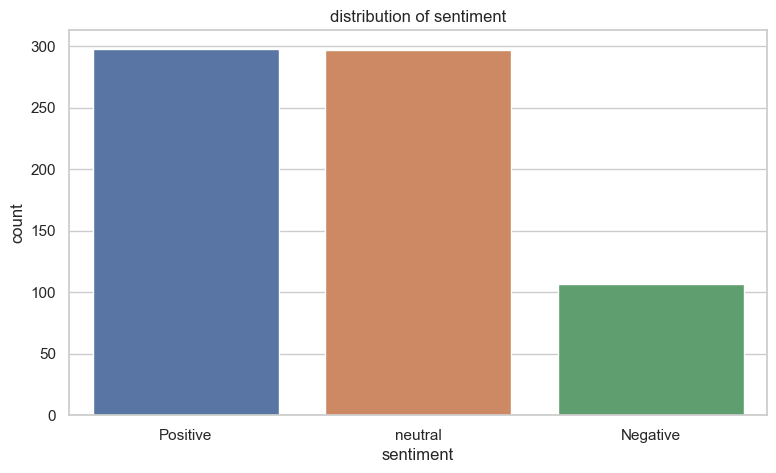

In [20]:
plt.figure(figsize = (9,5))
sns.barplot(x = sentiment_distribution.index,
           y = sentiment_distribution.values)
plt.title('distribution of sentiment')
plt.xlabel('sentiment')
plt.ylabel('count')
plt.show()

In [ ]:
#So, we can see althrough the app has low rating , 
#still the reviewrs dont use many negative words in
#the words in the reviews for the app.
#Next, we'll explore the relationship between the sentiments and the ratings.
#This analysis can help us understand whether there is a correlation between
#the sentiment of the text and numerical rating.

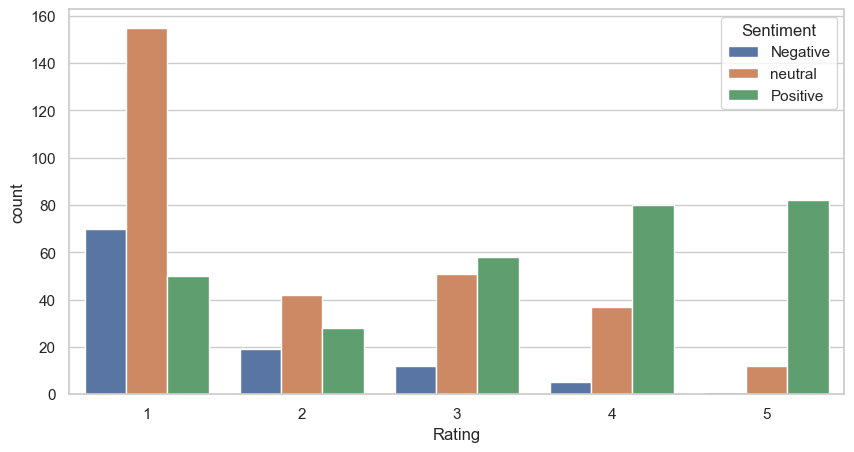

In [21]:
plt.figure(figsize = (10,5))
sns.countplot(data = df,
             x = 'Rating' ,
             hue = 'Sentiment')
plt.xlabel('Rating')
plt.ylabel('count')
plt.legend(title='Sentiment')
plt.show()